In [1]:
##import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.preprocessing import MinMaxScaler 
from feature_engine.outliers import Winsorizer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
##load the data set
data = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Data science\podigry_infotech\task3\bank-additional\bank-additional.csv",delimiter = ";")
data.rename(columns={'y':'deposit'}, inplace=True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
##describe more about the data
data.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [6]:
##check null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [7]:
##check duplicates
data.duplicated().sum()

0

In [8]:
## Auto EDA
## sweetviz
import sweetviz as sv
report = sv.analyze(data)
report.show_html()


C:\Users\ADMIN\.conda\envs\session\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
## dtail
import dtale
report = dtale.show(data)
report.open_browser()


In [10]:
##check unique values
data['default'].unique()


array(['no', 'unknown', 'yes'], dtype=object)

In [11]:
data['default'].value_counts()

default
no         3315
unknown     803
yes           1
Name: count, dtype: int64

In [12]:
##replacing values
data['default'] = data['default'].replace({'no':1,'unknown':1,'yes':0}).infer_objects(copy=False)
data['default']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12192\4029224236.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0       1
1       1
2       1
3       1
4       1
       ..
4114    1
4115    1
4116    1
4117    1
4118    1
Name: default, Length: 4119, dtype: int64

In [13]:
##split the data in to input and output
x = data.drop('default',axis = 1)
print(x)

      age          job  marital          education  housing     loan  \
0      30  blue-collar  married           basic.9y      yes       no   
1      39     services   single        high.school       no       no   
2      25     services  married        high.school      yes       no   
3      38     services  married           basic.9y  unknown  unknown   
4      47       admin.  married  university.degree      yes       no   
...   ...          ...      ...                ...      ...      ...   
4114   30       admin.  married           basic.6y      yes      yes   
4115   39       admin.  married        high.school      yes       no   
4116   27      student   single        high.school       no       no   
4117   58       admin.  married        high.school       no       no   
4118   34   management   single        high.school      yes       no   

        contact month day_of_week  duration  campaign  pdays  previous  \
0      cellular   may         fri       487         2    999 

In [14]:
y = data['default']
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
4114    1
4115    1
4116    1
4117    1
4118    1
Name: default, Length: 4119, dtype: int64


age                  Axes(0.125,0.11;0.065678x0.77)
duration          Axes(0.203814,0.11;0.065678x0.77)
campaign          Axes(0.282627,0.11;0.065678x0.77)
pdays             Axes(0.361441,0.11;0.065678x0.77)
previous          Axes(0.440254,0.11;0.065678x0.77)
emp.var.rate      Axes(0.519068,0.11;0.065678x0.77)
cons.price.idx    Axes(0.597881,0.11;0.065678x0.77)
cons.conf.idx     Axes(0.676695,0.11;0.065678x0.77)
euribor3m         Axes(0.755508,0.11;0.065678x0.77)
nr.employed       Axes(0.834322,0.11;0.065678x0.77)
dtype: object

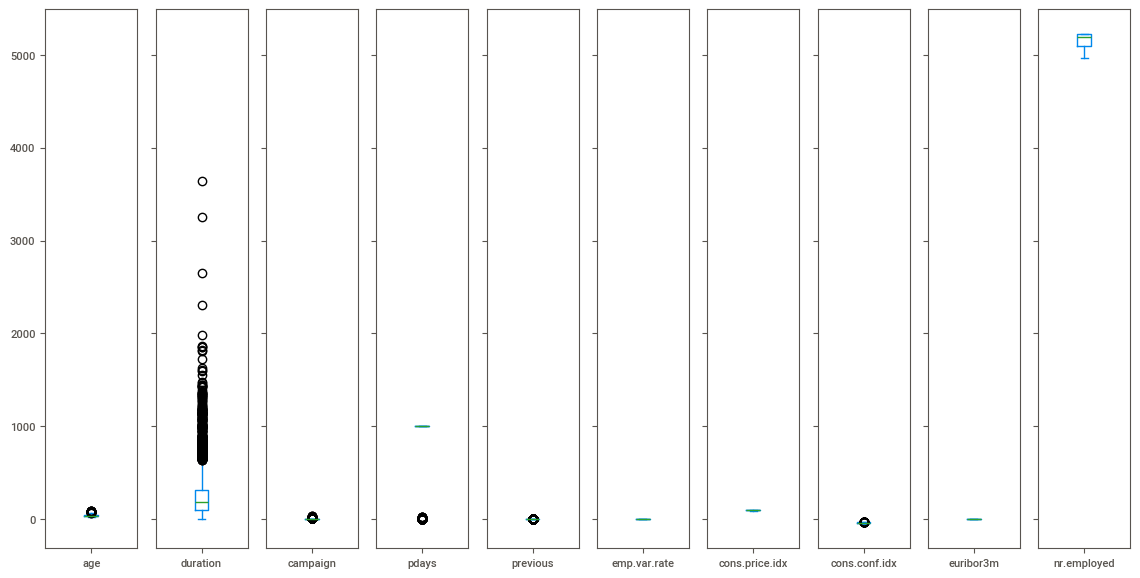

In [15]:
x.plot(kind = 'box',subplots = True,sharey = True,figsize = (14,7))

In [16]:
##using winsorization to treat the outliers
winsor = Winsorizer(capping_method = 'gaussian',fold = 1.5,tail = 'both')
outliers = winsor.fit(x)
clean = pd.DataFrame(outliers.transform(x),columns = outliers.get_feature_names_out())
clean

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30.000000,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487.0,2.0,999.0,0.0,nonexistent,-1.8,92.893000,-46.2,1.313,5099.1,no
1,39.000000,services,single,high.school,no,no,telephone,may,fri,346.0,4.0,999.0,0.0,nonexistent,1.1,93.994000,-36.4,4.855,5191.0,no
2,25.000000,services,married,high.school,yes,no,telephone,jun,wed,227.0,1.0,999.0,0.0,nonexistent,1.4,94.448622,-41.8,4.962,5228.1,no
3,38.000000,services,married,basic.9y,unknown,unknown,telephone,jun,fri,17.0,3.0,999.0,0.0,nonexistent,1.4,94.448622,-41.8,4.959,5228.1,no
4,47.000000,admin.,married,university.degree,yes,no,cellular,nov,mon,58.0,1.0,999.0,0.0,nonexistent,-0.1,93.200000,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30.000000,admin.,married,basic.6y,yes,yes,cellular,jul,thu,53.0,1.0,999.0,0.0,nonexistent,1.4,93.918000,-42.7,4.958,5228.1,no
4115,39.000000,admin.,married,high.school,yes,no,telephone,jul,fri,219.0,1.0,999.0,0.0,nonexistent,1.4,93.918000,-42.7,4.959,5228.1,no
4116,27.000000,student,single,high.school,no,no,cellular,may,mon,64.0,2.0,999.0,1.0,failure,-1.8,92.893000,-46.2,1.354,5099.1,no
4117,55.581784,admin.,married,high.school,no,no,cellular,aug,fri,528.0,1.0,999.0,0.0,nonexistent,1.4,93.444000,-36.1,4.966,5228.1,no


In [17]:
##split the data in to numerical and categorical columns
numeric_columns = clean.select_dtypes(exclude = ['object']).columns
numeric_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [18]:
categorical_columns = clean.select_dtypes(include = ['object']).columns
categorical_columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome', 'deposit'],
      dtype='object')

In [19]:
##create pipeline to remove null and outliers using numerical_columns
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean')),
                                 ('scale', MinMaxScaler())])

categorical_pipeline = Pipeline(steps = [('onehot',OneHotEncoder(drop = 'first'))])


In [20]:
##transfer to numerical and categorical columns
preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numeric_columns),
                                                 ('categorical', categorical_pipeline, categorical_columns)])


In [21]:
##fit to input data
fit = preprocessor.fit(clean)

In [22]:
##cleaned data
cleandata = pd.DataFrame(fit.transform(clean),columns = fit.get_feature_names_out())
cleandata

,num__age,num__duration,num__campaign,num__pdays,num__previous,num__emp.var.rate,num__cons.price.idx,num__cons.conf.idx,num__euribor3m,num__nr.employed,...,categorical__month_nov,categorical__month_oct,categorical__month_sep,categorical__day_of_week_mon,categorical__day_of_week_thu,categorical__day_of_week_tue,categorical__day_of_week_wed,categorical__poutcome_nonexistent,categorical__poutcome_success,categorical__deposit_yes
0,0.173083,0.762370,0.185562,1.0,0.000000,0.125543,0.104851,0.086354,0.072499,0.250465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.464003,0.541643,0.556686,1.0,0.000000,0.918020,0.738398,0.797423,0.952780,0.784436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.011460,0.355355,0.000000,1.0,0.000000,1.000000,1.000000,0.405609,0.979372,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.431678,0.026613,0.371124,1.0,0.000000,1.000000,1.000000,0.405609,0.978627,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.722598,0.090796,0.000000,1.0,0.000000,0.590098,0.281507,0.391098,0.787758,0.812326,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.173083,0.082968,0.000000,1.0,0.000000,1.000000,0.694665,0.340307,0.978378,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4115,0.464003,0.342832,0.000000,1.0,0.000000,1.000000,0.694665,0.340307,0.978627,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4116,0.076109,0.100188,0.185562,1.0,0.997087,0.125543,0.104851,0.086354,0.082689,0.250465,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4117,1.000000,0.826553,0.000000,1.0,0.000000,1.000000,0.421912,0.819190,0.980366,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
x_train,x_test,y_train,y_test = train_test_split(cleandata,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 52)
(1030, 52)
(3089,)
(1030,)


In [24]:
### Decision Tree Model
model = DT(criterion = 'gini',max_depth=5,min_samples_split=10)
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [25]:
##predict on the test data
preds = model.predict(x_test)
preds


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [26]:
# Accuracy # here you check whether predicted value and accurate value match or not
print(accuracy_score(y_test, preds))

pd.crosstab(y_test, preds, rownames = ['Actual'], colnames = ['Predictions']) 


0.9990291262135922


Predictions,0,1
Actual,,
1,1,1029


In [27]:
### Hyperparameter Optimization
param_grid = { 'criterion':['gini', 'entropy'], 'max_depth': np.arange(3, 15)}

# Decision tree model
dtree_model = DT()


In [28]:
# GridsearchCV with cross-validation to perform experiments with parameters set
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = 5, scoring = 'accuracy',
                          return_train_score = False, verbose = 1)

In [29]:
# Train the model with Grid search optimization technique
dtree_gscv.fit(x_train, y_train)

# The best set of parameter values
dtree_gscv.best_params_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\ADMIN\.conda\envs\session\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



{'criterion': 'gini', 'max_depth': 3}

In [30]:
# Model with best parameter values
DT_best = dtree_gscv.best_estimator_
DT_best

DecisionTreeClassifier(max_depth=3)

In [31]:
# Prediction on Test Data
preds1 = DT_best.predict(x_test)
preds1


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
#compare actual value and predicted value
pd.crosstab(y_test, preds, rownames = ['Actual'], colnames= ['Predictions']) 

# Accuracy
print(accuracy_score(y_test, preds))


0.9990291262135922


In [ ]:
import graphviz
from sklearn import tree

predictors = list(cleandata.columns)

dot_data = tree.export_graphviz(DT_best, filled=True, 
                                rounded=True, 
                                feature_names=predictors,
                                class_names=['Default', 'Not Default'],
                                out_file=None)

graph = graphviz.Source(dot_data)
graph.render("decision_tree") 
graph